In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import sys

sys.path.append(os.path.dirname(os.getcwd()))

In [21]:
import geomstats.backend as gs
import geomstats.datasets.utils as data_utils
from geomstats.geometry.pre_shape import PreShapeSpace, KendallShapeMetric

data, labels = data_utils.load_optical_nerves()
preshape = PreShapeSpace(m_ambient=3, k_landmarks=5)
metric = KendallShapeMetric(3, 5)

In [17]:
data_preshape = preshape.projection(data)
print(gs.all(preshape.belongs(data_preshape)))

True


In [24]:
pairwise = metric.dist_pairwise(data_preshape)

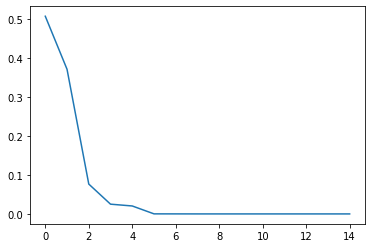

In [62]:
from geomstats.learning.pca import TangentPCA

tpca = TangentPCA(metric)
tpca.fit(data_preshape)

plt.plot(tpca.explained_variance_ratio_);

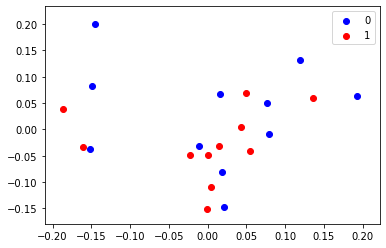

In [60]:
X = tpca.transform(data_preshape)

for label, col in zip([0, 1], ['b', 'r']):
    mask = labels == label
    plt.scatter(X[mask, 0], X[mask, 1], c=col, label=label);
plt.legend();